# TRABAJO PRACTICO 
##  Estudio Nacional sobre el Perfil de las Personas con Discapacidad

In [1]:
# importamos las librerías necesarias para trabajar.

#Datos
import pandas as pd
import numpy as np

#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns

#Otros 
import warnings
warnings.filterwarnings('ignore')

pwd

ls


# Importamos dataset de Base de estudios de discapacidad 2018

In [2]:
base_datos = pd.read_csv('base_estudio_discapacidad_2018.csv', engine = 'python', error_bad_lines=False, delimiter= ';')
# el delimiter indica como estan separadas las columnas en el dataframe

In [3]:
# con esto veo el tamaño del data frame
np.shape(base_datos)


(82327, 35)

In [4]:
# con .head veo las prrimeras 5 filas del dataframe
# con .tail veo el final del data frame

base_datos.head()

,ID,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,pa01,Relación de parentesco,Sexo,edad_grandes_grupos,...,Sabe leer y escribir,Asiste a establecimiento educativo,Modalidad educativa de asistencia actual y pasada,Máximo nivel educativo alcanzado,Principal motivo de no cursar actualmente/nunca cursó,Convive en pareja,Estado civil legal,Motivo principal por el que no busco trabajo,Condición de actividad,Categoría ocupacional
0,1,413,4,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,1,Jefe/a,Varón,15 a 64,...,,,,,,,,,,
1,2,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,3,Hija(o)/ hijastra(o),Varón,15 a 64,...,,,,,,,,,,
2,3,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,4,Hija(o)/ hijastra(o),Varón,15 a 64,...,,,,,,,,,,
3,4,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,5,Hija(o)/ hijastra(o),Varón,0 a 14,...,,,,,,,,,,
4,5,409,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,1,Jefe/a,Mujer,15 a 64,...,,,,,,,,,,


### Columnas
Si queremos saber el nombre de las columas en una variable utilizamos el metodo *.columns()*.

Para guardarlo, simplemente lo asignamos a una variable.


In [5]:
nombre_columnas = base_datos.columns.values
nombre_columnas

array(['ID', 'pondera', 'personas_hogar', 'hogar_dificultad',
       'personas_dificultad_hogar', 'tipo_hogar', 'pa01',
       'Relación de parentesco', 'Sexo', 'edad_grandes_grupos',
       'edad_agrupada', 'imputadoB', 'imputadoC', 'imputadoD',
       'Personas de 6 años y más con dificultad',
       'Personas con dificultad considerando toda la población',
       'Cantidad de dificultades', 'Cantidad y tipo de dificultad',
       'certificado', 'Comienzo de la dificultad', 'edad_inicio',
       'Causa de la dificultad', 'Cobertura de salud',
       'Recibe jubilación o pensión',
       'Tipo de beneficioSabe leer y escribir que recibe',
       'Sabe leer y escribir', 'Asiste a establecimiento educativo',
       'Modalidad educativa de asistencia actual y pasada',
       'Máximo nivel educativo alcanzado',
       'Principal motivo de no cursar actualmente/nunca cursó',
       'Convive en pareja', 'Estado civil legal',
       'Motivo principal por el que no busco trabajo',
       'Con

# 1.0 limpiamos los datos

En esta parte nos vamos a encargar de limpiar:

* Duplicados  --> [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) Elimina registros con duplicados


* 1.1) Simbolos --> [str.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html) and [str.extract](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html)



* 1.2)'NaN' --> [.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)



* 1.3) Cantidad y % de NaN por columna


* Luego de quitarlos, devolver shape del df

##  1.1 duplicados

In [ ]:


# Vamos a eliminar las de la columna 'App' los valores repetidos, conservando unicamente la primera ocurrencia.
base_datos.drop_duplicates(subset='pondera', inplace=True, keep='first')

# Las columnas para quitar los duplicados se indican en el argumento 'subset'
# mientras que la primera ocurrencia se indica con el argumento 'keep'

# La opcion 'inplace' nos evitar tener asignar la salida a una variable.
# Directamente se guarda sobre 'base_datos'. Equivale a:

base_datos = base_datos.drop_duplicates(subset='pondera', keep='first')




## 1.2 Simbolos
Las columnas 'Installs', 'Size', 'Price' y 'Reviews' tienen informacion en la que estamos interesados.

El problema es que estan en formato texto (o *string*) y hay simbolos y valores que nos impiden manipularlos en formato numerico ( *int* o *float*)El problema es que estan en formato texto (o *string*) y hay simbolos y valores que nos impiden manipularlos en formato numerico ( *int* o *float*)


para el caso en particular no contiene simbolos como "+" o ","


cant_NaN = base_datos.isnull().sum()
print(cant_NaN,'\r\n')

## 1.3 NAN (Not A Number)
* nan significa "no es un número", un valor flotante que se obtiene si realiza un cálculo cuyo resultado no se puede expresar como un número. Cualquier cálculo que realice con NaN también dará como resultado NaN.
Ahora verificamos que las columnas no tengan NaN.

En caso de haberlos, tendremos que decidir:

- si son suficientes como para eliminar TODA la columa y perder esa informacion, o

        
- decidir eliminar unicamente los registros.

### Reviso que no existan valores nulos en mi dataset

In [7]:
col_NaN = base_datos.isnull().any()
print(col_NaN,'\r\n')

ID                                                        False
pondera                                                   False
personas_hogar                                            False
hogar_dificultad                                          False
personas_dificultad_hogar                                 False
tipo_hogar                                                False
pa01                                                      False
Relación de parentesco                                    False
Sexo                                                      False
edad_grandes_grupos                                       False
edad_agrupada                                             False
imputadoB                                                 False
imputadoC                                                 False
imputadoD                                                 False
Personas de 6 años y más con dificultad                   False
Personas con dificultad considerando tod

In [8]:
# Cantidad de valores/registros tenemos con NaNs y lo ordenados descendentemente con isnull().sum().sort_values(ascending=False)
total = base_datos.isnull().sum().sort_values(ascending=False)
total


Categoría ocupacional                                     0
Sexo                                                      0
Personas de 6 años y más con dificultad                   0
imputadoD                                                 0
imputadoC                                                 0
imputadoB                                                 0
edad_agrupada                                             0
edad_grandes_grupos                                       0
Relación de parentesco                                    0
Cantidad de dificultades                                  0
pa01                                                      0
tipo_hogar                                                0
personas_dificultad_hogar                                 0
hogar_dificultad                                          0
personas_hogar                                            0
pondera                                                   0
Personas con dificultad considerando tod

In [168]:
# Cantidad de valores nulos ordenados descendentemente
total = base_datos.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
# porcentaje de NaNs que representa sobre el total del dataset por columnas
percent = (base_datos.isnull().sum()/base_datos.isnull().count()).sort_values(ascending=False)


In [115]:
# Mostramos los 2 resultados en conjunto.
# Axis=1 para ponerlo en columna 
# keys= ponemos el nombre de esas columnas del dataframe
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# con missing_data.head(10) ploeto las primeras 10 columnas 
missing_data.head(35)


,Total,Percent
Categoría ocupacional,0,0.0
Sexo,0,0.0
Personas de 6 años y más con dificultad,0,0.0
imputadoD,0,0.0
imputadoC,0,0.0
imputadoB,0,0.0
edad_agrupada,0,0.0
edad_grandes_grupos,0,0.0
Relación de parentesco,0,0.0
Cantidad de dificultades,0,0.0


In [169]:
# Limpiamos registros con '.dropna'
base_datos.dropna(how ='any', inplace = True)

In [170]:
# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {base_datos.shape[0]} filas x {base_datos.shape[1]} columnas')

Nos quedamos con un dataframe de 2172 filas x 35 columnas


In [13]:
np.shape(base_datos)

(2172, 35)

## Ahora que terminamos con la limpieza general del dataset, pasemos a analizar
* Pondera
* Cantidad de personas en el hogar
* Personas de 6 años y más con dificultad
* Condición de actividad

## ponderador


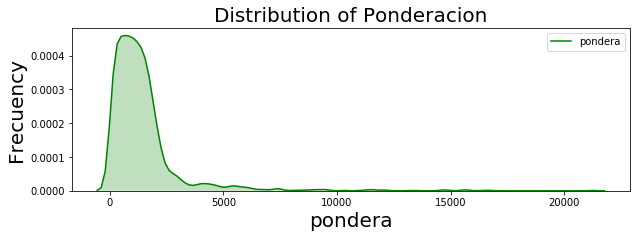

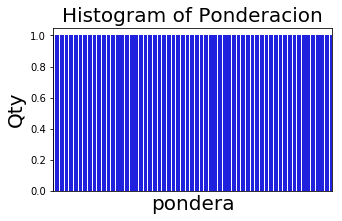

En total hay 2172 categorias


 [ 413  473  409 ... 5230 1282 1205]


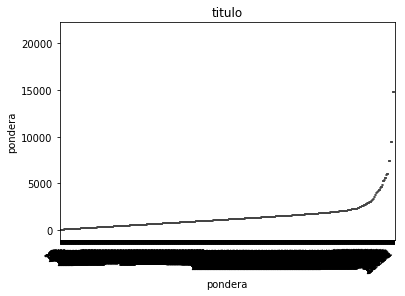

In [196]:
plt.figure(figsize=(10,3))
sns.kdeplot(base_datos['pondera'], color= "green", shade = True)
plt.xlabel("pondera",size = 20)
plt.ylabel("Frecuency",size = 20)
plt.title('Distribution of Ponderacion',size = 20)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(base_datos.pondera, color="Blue")
plt.xlabel("pondera",size = 20)
plt.ylabel("Qty",size = 20)
plt.title('Histogram of Ponderacion',size = 20)
plt.xticks([]) # por si deseamos eliminar los intervalos en el eje-x
#plt.imsave('Histogram',format='png') # Guardar la imagen
plt.show()

# Gardamos en una variable la cantidad de categorias
q_categorias = len(base_datos['pondera'].unique())
print(f'En total hay {q_categorias} categorias\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", base_datos['pondera'].unique())


ay = sns.boxplot(x = base_datos.pondera, y = base_datos.pondera, data = base_datos)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("titulo")
plt.show()


# Cantidad de personas con dificultad en el hogar
* Hogares con al menos una persona con dificultad

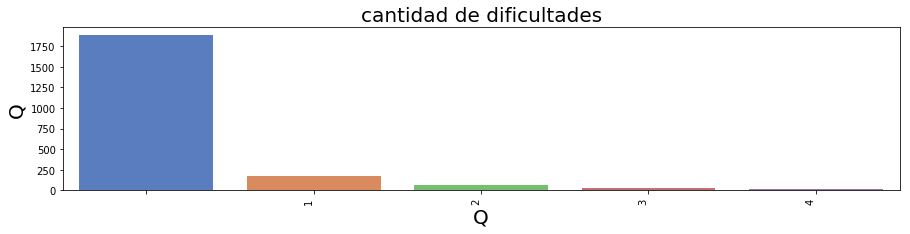

In [175]:
# Guardamos los indices de los top_n categorias
idx_top = base_datos['Cantidad de dificultades'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(x="Cantidad de dificultades", data=base_datos, order=idx_top, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('cantidad de dificultades', size = 20)
plt.xlabel("Q", size = 20)
plt.ylabel("Q", size = 20)
plt.show()


# Cantidad de personas en el hogar

* todos los hogares

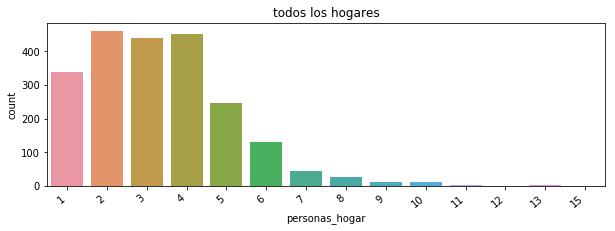

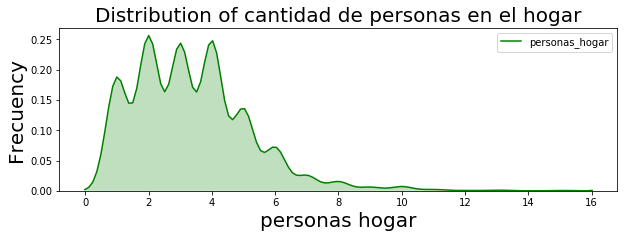

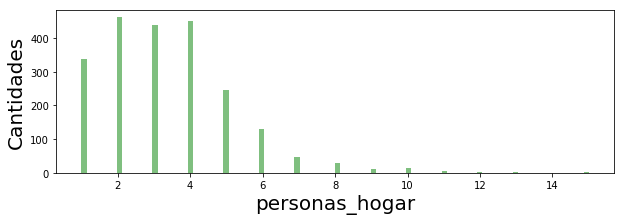

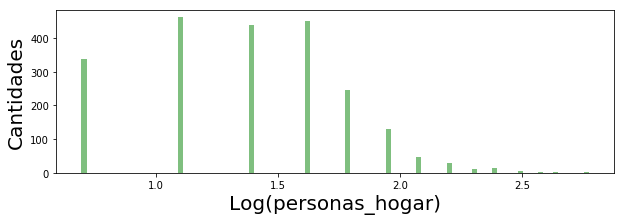

In [193]:
plt.figure(figsize=(10,3))
ax = sns.countplot(x="personas_hogar", data=base_datos)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("todos los hogares")
plt.show()


# En este primer plot vamos a ver una estimacion de la distribucion de de los reviews de la cantidad de Reviews
plt.figure(figsize=(10,3))
g = sns.kdeplot(base_datos.personas_hogar, color="Green", shade = True)
plt.xlabel("personas hogar",size = 20)
plt.ylabel("Frecuency",size = 20)
plt.title('Distribution of cantidad de personas en el hogar',size = 20)
plt.show()

# En este segundo plot vamos a ver el histograma 
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x
plt.figure(figsize=(10,3))
plt.hist(base_datos['personas_hogar'], bins=100,color='g' ,alpha=0.5)
plt.xlabel("personas_hogar",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

plt.figure(figsize=(10,3))
plt.hist(np.log(1+base_datos.personas_hogar),bins=100, color='g' ,alpha=0.5)
plt.xlabel("Log(personas_hogar)",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

# Categoría ocupacional
* Población ocupada de 14 años y más con dificultad

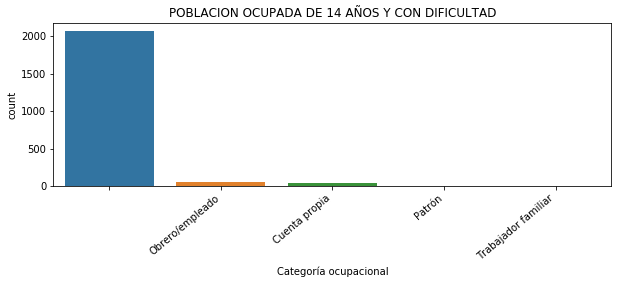

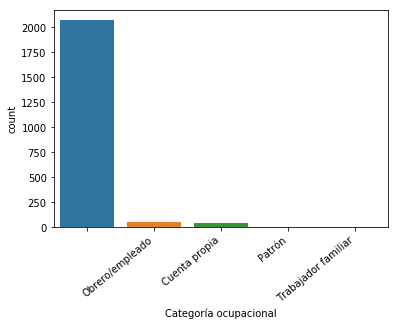

In [189]:

plt.figure(figsize=(10,3))
ax = sns.countplot(x="Categoría ocupacional", data=base_datos)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("POBLACION OCUPADA DE 14 AÑOS Y CON DIFICULTAD")
plt.show()

ax = sns.countplot(x="Categoría ocupacional", data=base_datos)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()


# Motivo principal por el que no busco trabajo (PC26)

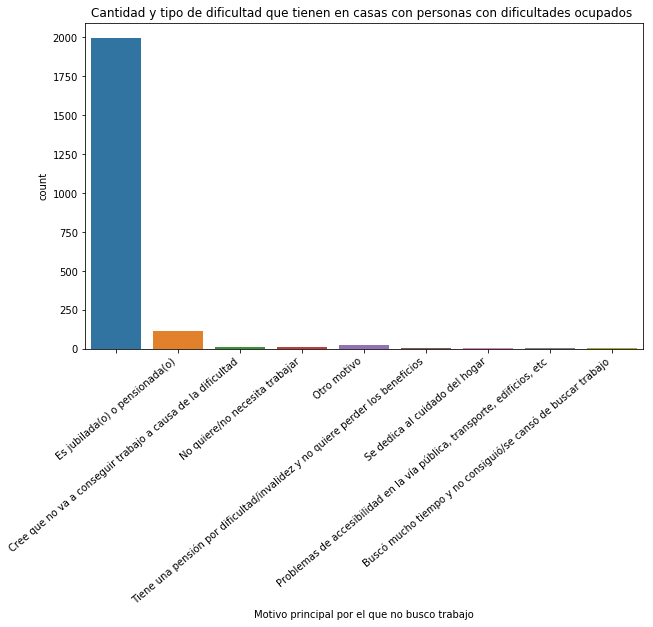

In [181]:

data=base_datos
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Motivo principal por el que no busco trabajo", data=base_datos)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Cantidad y tipo de dificultad que tienen en casas con personas con dificultades ocupados ")
plt.show()